In [32]:
### Main plot tool ###

from PIL import Image, ImageDraw, ImageEnhance

def mask_object_in_image_translucent(image_path, mask_areas, opacity=0.5):
    """
    Masks specified areas in an image with a translucent overlay.

    Parameters:
    - image_path: Path to the image file.
    - mask_areas: List of tuples representing the areas to mask. Each tuple is (left, top, right, bottom).
    - opacity: Opacity level of the mask, where 0 is completely transparent and 1 is fully opaque.

    Returns:
    - A PIL Image object with the areas masked by a translucent overlay.
    """
    with Image.open(image_path) as img:
        # Create a transparent overlay
        overlay = Image.new("RGBA", img.size, (255, 0, 0, 0))
        draw = ImageDraw.Draw(overlay)

        # Draw semi-transparent rectangles on the overlay
        for area in mask_areas:
            draw.rectangle(area, fill=(255, 0, 0, int(255 * opacity)))  # Black with transparency

        # Composite the overlay onto the original image
        img_with_overlay = Image.alpha_composite(img.convert("RGBA"), overlay)

        return img_with_overlay.convert("RGB")  # Convert back to RGB if needed

# Example usage
image_path = "./input_images/14219.png"
mask_areas = [(120, 220, 294, 380), (49, 400, 390, 600), (400, 240, 450, 690)]  # Example areas, replace with actual coordinates
masked_image = mask_object_in_image_translucent(image_path, mask_areas, opacity=0.4)  # 50% opacity
masked_image.show()


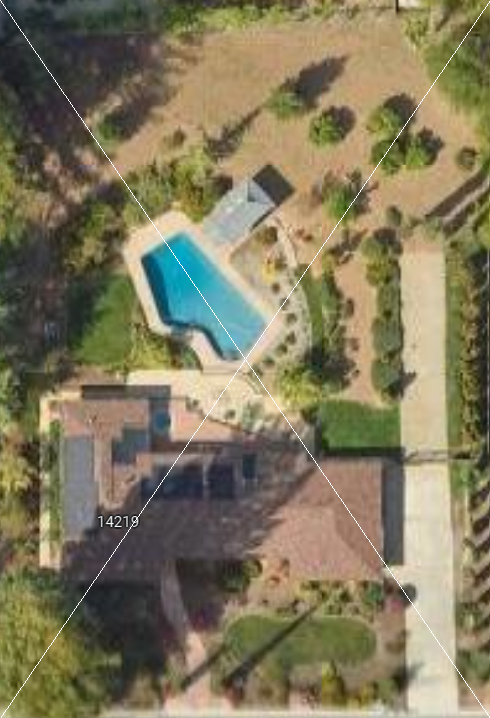

In [1]:
from PIL import Image, ImageDraw
from IPython.display import display

with Image.open("./input_images/14219.png") as im:

    draw = ImageDraw.Draw(im)
    draw.line((0, 0) + im.size, fill=128)
    draw.line((0, im.size[1], im.size[0], 0), fill=128)

    # write to stdout
    display(im)

In [5]:
from PIL import Image, ImageDraw
from IPython.display import display

def mask_object_in_image(image_path, mask_areas):
    """
    Masks specified areas in an image.
    
    Parameters:
    - image_path: Path to the image file.
    - mask_areas: List of tuples representing the areas to mask. Each tuple is (left, top, right, bottom).
    
    Returns:
    - A PIL Image object with the areas masked.
    """
    with Image.open(image_path) as img:
        draw = ImageDraw.Draw(img)
        for area in mask_areas:
            draw.rectangle(area, fill="black")  # Fill with black or any other color
        return img

# Example usage
image_path = "./input_images/14219.png"
mask_areas = [(50, 50, 100, 100), (200, 200, 250, 250)]  # Example areas, replace with your actual coordinates
masked_image = mask_object_in_image(image_path, mask_areas)
masked_image.show()


In [15]:
import cv2

# This is a simplified example and won't run without a proper model and setup.

# Step 1: Load your object detection model
object_detector = load_model('path_to_pretrained_model')

# Step 2: Run object detection on the image
image = cv2.imread('path_to_image.jpg')
detected_objects = object_detector.detect_objects(image)

# Step 3: Extract coordinates and apply masks
mask_areas = []
colors = []

for obj in detected_objects:
    if obj.label == 'pool':
        mask_areas.append(obj.bounding_box)
        colors.append((0, 0, 255))  # Blue
    elif obj.label == 'property':
        mask_areas.append(obj.bounding_box)
        colors.append((255, 255, 0))  # Yellow
    elif obj.label == 'road':
        mask_areas.append(obj.bounding_box)
        colors.append((128, 0, 128))  # Purple

# Step 4: Mask the image
masked_image = mask_object_in_image_solid('path_to_image.jpg', mask_areas, colors)
masked_image.show()


NameError: name 'load_model' is not defined

In [ ]:
import cv2
import numpy as np

def find_color_bounds(image, lower_color, upper_color):
    # Convert the image to the HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # Find the colors within the specified boundaries
    mask = cv2.inRange(hsv_image, lower_color, upper_color)
    # Find contours in the mask
    contours, _ = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # Get the bounding box of the largest contour
    if contours:
        c = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(c)
        return (x, y, x + w, y + h)
    return None

# Load the image
image = cv2.imread('./input_images/14219.png')

# Define color ranges for detection in HSV
# These ranges should be determined based on the colors of the pool, property, and road
# For example, if the pool is blue:
blue_lower = np.array([100, 150, 150])
blue_upper = np.array([140, 255, 255])

# Detect objects by color
pool_bounds = find_color_bounds(image, blue_lower, blue_upper)
# Repeat for other colors and objects

# Apply masking if bounds are found
if pool_bounds:
    # Draw a rectangle mask on the image
    cv2.rectangle(image, (pool_bounds[0], pool_bounds[1]), (pool_bounds[2], pool_bounds[3]), (255, 255, 255), -1)

# Save or display the masked image
cv2.imshow('Masked Image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()
